# ASSIGNMENT ON CLASSIFICATION


In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
data=pd.read_excel(r"C:\Users\USER\Downloads\iris.xls")

In [3]:
# Displaying data 
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Summary Statistics of data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Finding the columns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
# Finding the datatypes of each column
data.dtypes


SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
#Checking null values if any
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
#Filling the null values
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [9]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

OUTLIER DETECTION AND REMOVING

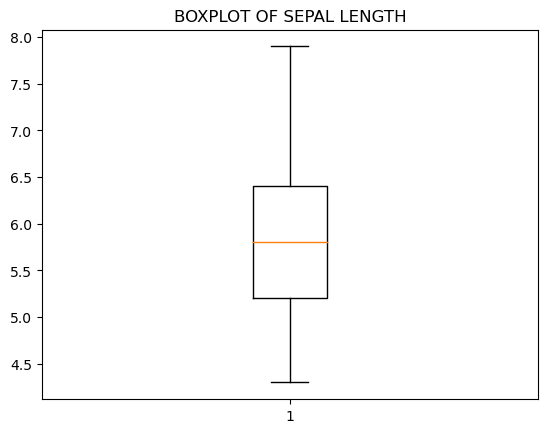

In [10]:
# Boxplot to find whether there is any outlier

plt.boxplot(data['SL'])
plt.title("BOXPLOT OF SEPAL LENGTH")
plt.show()


NO OUTLIERS DETECTED

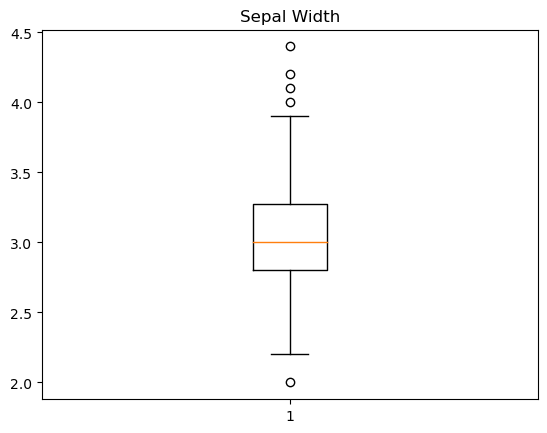

In [11]:
plt.boxplot(data['SW'])
plt.title('Sepal Width')
plt.show()

In [12]:
outliers detected.so removing the outliers

SyntaxError: invalid syntax (2406556680.py, line 1)

In [13]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [14]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [15]:
#interquartile range
IQR=Q3-Q1
IQR

0.4500000000000002

In [16]:
low_lmt=Q1-(1.5*IQR)
up_lmt=Q3+(1.5*IQR)

In [17]:
outlier=[]
for x in data['SW']:
    if((x>up_lmt) or (x< low_lmt)):
        outlier.append(x)


In [18]:
print(outlier)


[4.0, 4.4, 4.1, 4.2, 2.0]


In [19]:
indx=data['SW']>up_lmt


In [20]:
outlier_index = data.loc[indx].index


In [21]:
#removing outlier
data.drop(outlier_index,inplace=True)


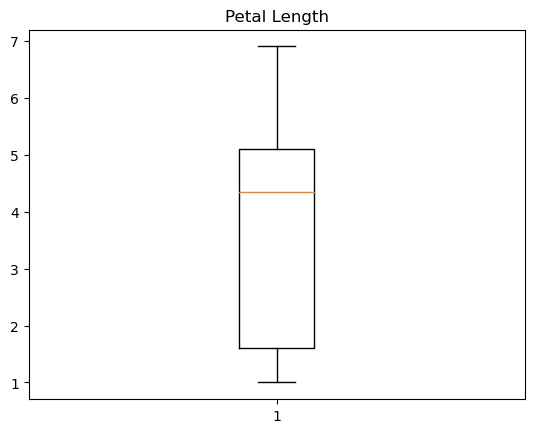

In [22]:
plt.boxplot(data['PL'])
plt.title('Petal Length')
plt.show()


NO OUTLIERS DETECTED



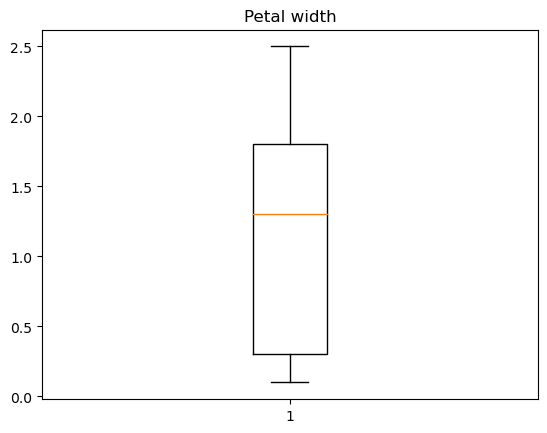

In [23]:
plt.boxplot(data['PW'])
plt.title('Petal width')
plt.show()

NO OUTLIERS DETECTED

# LABEL ENCODING

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
#Label encoding process
label_encoder=LabelEncoder()

In [26]:
data['Classification']=label_encoder.fit_transform(data['Classification'])


In [27]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


LOGISTIC REGRESSION AFTER MINMAX SCALING



In [29]:
X=data.drop('Classification',axis=1)
y=data['Classification']


In [30]:
X

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


MIN MAX SCALING

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms=MinMaxScaler()
X.loc[:,:]=mms.fit_transform(X)
X

,SL,SW,PL,PW
0,0.222222,0.789474,0.067797,0.041667
1,0.166667,0.526316,0.067797,0.041667
2,0.416667,0.631579,0.050847,0.041667
3,0.083333,0.578947,0.084746,0.041667
4,0.194444,0.842105,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.526316,0.711864,0.916667
146,0.555556,0.263158,0.677966,0.750000
147,0.611111,0.526316,0.567797,0.791667
148,0.527778,0.736842,0.745763,0.916667


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Splitting into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [35]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [36]:
# Creating logistic regression model
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [38]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_logit)


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [39]:
# Finding Accuracy

In [40]:
accuracy_score(y_test,y_pred_logit)


0.9333333333333333

ACCURACY OF LOGISTIC REGRESSION IS 93%

# MODEL 2 kNN


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#Finding optimum K value
metric_k=[]
neighbours=range(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [46]:
metric_k

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [47]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
confusion_matrix(y_test,y_pred_kNN)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred_kNN)


0.9666666666666667

ACCURACY OF kNN after MINMAXSCALING is 96% with neighbours=5



# MODEL 3- SVM AFTER MINMAX SCALING


SVM- LINEAR KERNEL



In [50]:
from sklearn.svm import SVC

In [51]:
#Creating svm model with linear kernel
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [52]:
#confusion matrix
confusion_matrix(y_test,y_pred_svm)


array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [53]:
#Finding accuracy
accuracy_score(y_test,y_pred_svm)

0.9666666666666667

# MODEL 4 - LOGISTIC REGRESSION AFTER STANDARD SCALING


In [54]:
# Separating feature and target
X=data.drop('Classification',axis=1)
y=data['Classification']

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
#Standard Scaling
sc=StandardScaler()


In [57]:
X.loc[:,:]=sc.fit_transform(X)


In [58]:
# Splitting into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [59]:
# Creating model Logistic Regression
logit_model=LogisticRegression()
logit_model=logit_model.fit(X_train,y_train)
y_pred_logit=logit_model.predict(X_test)


In [60]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_logit)


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [61]:
# Finding accuracy
accuracy_score(y_test,y_pred_logit)

0.9666666666666667

LOGISTIC REGRESSION ACCURACY 96% WITH STANDARD SCALING USED (BETTER THAN MINMAX SCALING)



# MODEL 5 kNN AFTER USING STANDARD SCALING

In [62]:
#Finding k value
metric_k=[]
neighbours=range(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [63]:
# creating kNN with optimum value for neigbours =7
classifier = KNeighborsClassifier(n_neighbors=7)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
confusion_matrix(y_test,y_pred_kNN)


array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred_kNN)

1.0

Highest accuracy 100% when neighbours=7



# Decision Tree


In [66]:
# Separating feature and target
X=data.drop('Classification',axis=1)
y=data['Classification']


In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [68]:
from sklearn.tree import DecisionTreeClassifier


In [69]:
# Decision tree model
dtclsf=DecisionTreeClassifier()
dtclsf=dtclsf.fit(X_train,y_train)
y_pred_dt=dtclsf.predict(X_test)


In [70]:
#confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [71]:
#Finding accuracy
accuracy_score(y_test,y_pred_dt)


0.9333333333333333

# Accuracy of Decision Tree Algoritham is 93%

# RANDOM FOREST ALGORITHAM


In [72]:
# Separating feature and target
X=data.drop('Classification',axis=1)
y=data['Classification']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [74]:
from sklearn.ensemble import RandomForestClassifier


In [75]:
# Random forest model
rndmf=RandomForestClassifier()
rndmf=rndmf.fit(X_train,y_train)
y_pred_rf=rndmf.predict(X_test)


In [76]:
confusion_matrix(y_test,y_pred_rf)


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [78]:
#Finding Accuracy
accuracy_score(y_test,y_pred_rf)

0.9333333333333333

Accuracy of Random Forest is 93%

# ACCURACY IS MORE FOR KNN MODEL..100 %.So best is KNN model